In [4]:
from datasets import load_dataset
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Loading the Dataset

In [5]:
datasets = load_dataset('financial_phrasebank', 'sentences_allagree', split='train').train_test_split(test_size=0.2, seed=200)
train_dataset = datasets['train']
test_dataset = datasets['test']

Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

Dataset financial_phrasebank downloaded and prepared to /root/.cache/huggingface/datasets/financial_phrasebank/sentences_allagree/1.0.0/550bde12e6c30e2674da973a55f57edde5181d53f5a5a34c1531c53f93b7e141. Subsequent calls will reuse this data.


# Neural Network Models

## Tokenization

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense, Embedding, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, f1_score, accuracy_score
import time

In [7]:
train_df = train_dataset.to_pandas()
test_df = test_dataset.to_pandas()
complete_df = pd.concat([train_df, test_df], axis = 0, ignore_index = True)

In [8]:
X_train = train_df["sentence"].to_numpy()
y_train = to_categorical(train_df["label"])
X_test = test_df["sentence"].to_numpy()
y_test = to_categorical(test_df["label"])

In [9]:
words = 20000 
tokenizer=Tokenizer(words,lower=True)
tokenizer.fit_on_texts(complete_df["sentence"])

In [10]:
X_train_tokenized = pad_sequences(tokenizer.texts_to_sequences(X_train),maxlen = 40,padding='post')
X_test_tokenized = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen = 40, padding = 'post')

## RNN Model

In [133]:
model = Sequential()
model.add(Embedding(input_dim = words, output_dim = 128, input_length= X_train_tokenized.shape[1]))
model.add(SimpleRNN(128,return_sequences=False))
model.add(Dropout(0.35))
model.add(Dense(64,activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

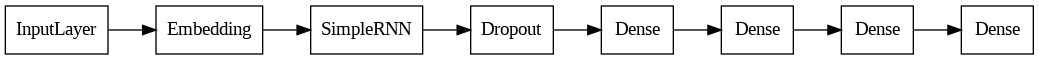

In [127]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=False, show_layer_names= False, rankdir = 'LR')

In [134]:
cb = EarlyStopping(monitor = 'val_loss', patience = 20, mode = 'max', restore_best_weights = True)
history = model.fit(X_train_tokenized , y_train, epochs = 20, batch_size = 50, validation_split = 0.25, callbacks = [cb])

Epoch 1/20
28/28 [==============================] - 8s 207ms/step - loss: 0.9344 - accuracy: 0.6082 - val_loss: 0.9221 - val_accuracy: 0.5982
Epoch 2/20
28/28 [==============================] - 4s 135ms/step - loss: 0.9178 - accuracy: 0.6230 - val_loss: 0.9168 - val_accuracy: 0.6071
Epoch 3/20
28/28 [==============================] - 4s 144ms/step - loss: 0.8436 - accuracy: 0.6561 - val_loss: 1.0265 - val_accuracy: 0.5651
Epoch 4/20
28/28 [==============================] - 4s 143ms/step - loss: 0.6520 - accuracy: 0.7577 - val_loss: 0.8737 - val_accuracy: 0.6468
Epoch 5/20
28/28 [==============================] - 3s 90ms/step - loss: 0.4321 - accuracy: 0.8476 - val_loss: 0.8971 - val_accuracy: 0.6402
Epoch 6/20
28/28 [==============================] - 2s 75ms/step - loss: 0.2636 - accuracy: 0.9227 - val_loss: 1.3018 - val_accuracy: 0.5850
Epoch 7/20
28/28 [==============================] - 2s 83ms/step - loss: 0.2043 - accuracy: 0.9367 - val_loss: 1.5038 - val_accuracy: 0.5121
Epoch 8/2

In [137]:
strt = time.time()
predictions = model.predict(X_test_tokenized)
end = time.time()
t1 = end - strt
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))
print("Accuracy", accuracy_score(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1)))
print("F1 Score", f1_score(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1), average = "weighted"))
print("Evaluation Time", t1)

15/15 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

    positive       0.41      0.39      0.40        64
    negative       0.78      0.72      0.75       268
     neutral       0.44      0.53      0.48       121

    accuracy                           0.62       453
   macro avg       0.54      0.55      0.54       453
weighted avg       0.64      0.62      0.63       453

Accuracy 0.6225165562913907
F1 Score 0.6288481038097332
Evaluation Time 0.28474879264831543


## LSTM Model

In [68]:
model = Sequential()
model.add(Embedding(input_dim = words, output_dim = 128, input_length= X_train_tokenized.shape[1]))
model.add(LSTM(128,return_sequences=False))
model.add(Dropout(0.35))
model.add(Dense(64,activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

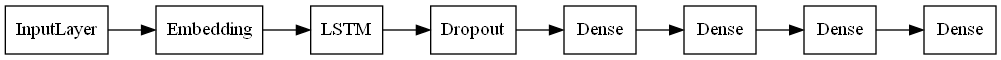

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=False, show_layer_names= False, rankdir = 'LR')

In [69]:
cb = EarlyStopping(monitor = 'val_loss', patience = 20, mode = 'max', restore_best_weights = True)
history = model.fit(X_train_tokenized , y_train, epochs = 20, batch_size = 50, validation_split = 0.25, callbacks = [cb])

Epoch 1/20
28/28 [==============================] - 8s 168ms/step - loss: 0.9143 - accuracy: 0.6303 - val_loss: 0.8681 - val_accuracy: 0.6247
Epoch 2/20
28/28 [==============================] - 4s 149ms/step - loss: 0.6731 - accuracy: 0.7312 - val_loss: 0.6000 - val_accuracy: 0.7682
Epoch 3/20
28/28 [==============================] - 3s 99ms/step - loss: 0.4762 - accuracy: 0.8063 - val_loss: 0.7659 - val_accuracy: 0.7130
Epoch 4/20
28/28 [==============================] - 2s 67ms/step - loss: 0.3880 - accuracy: 0.8336 - val_loss: 0.4961 - val_accuracy: 0.7969
Epoch 5/20
28/28 [==============================] - 3s 100ms/step - loss: 0.3154 - accuracy: 0.8564 - val_loss: 0.7614 - val_accuracy: 0.7152
Epoch 6/20
28/28 [==============================] - 2s 56ms/step - loss: 0.2910 - accuracy: 0.8601 - val_loss: 0.7089 - val_accuracy: 0.7616
Epoch 7/20
28/28 [==============================] - 2s 79ms/step - loss: 0.2794 - accuracy: 0.8660 - val_loss: 0.5986 - val_accuracy: 0.8057
Epoch 8/20

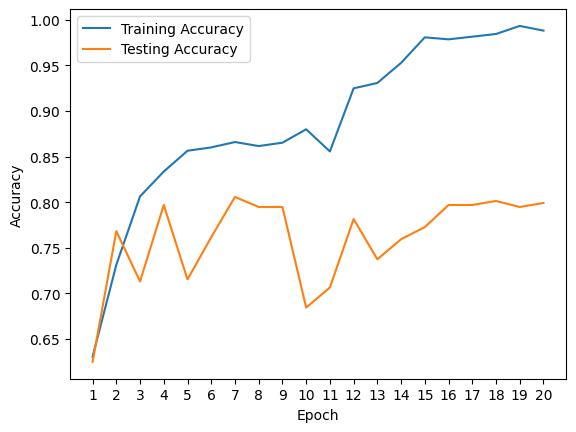

In [70]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([i for i in range(20)], [i+1 for i in range(20)])
plt.legend(loc='best')
plt.show()

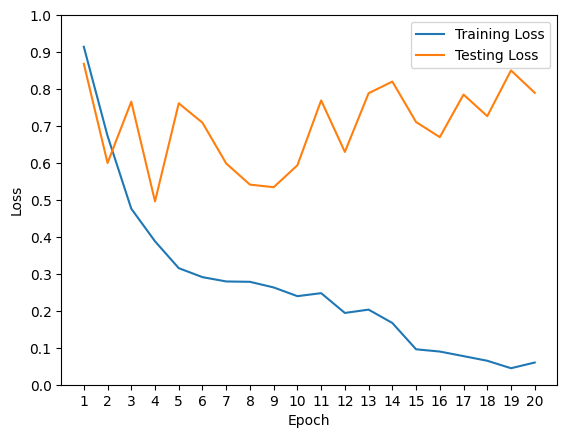

In [71]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([i for i in range(20)], [i+1 for i in range(20)])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(loc='best')
plt.show()

In [72]:
strt = time.time()
predictions = model.predict(X_test_tokenized)
end = time.time()
t2 = end - strt
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))
print("Accuracy", accuracy_score(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1)))
print("F1 Score", f1_score(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1), average = "weighted"))
print("Evaluation Time", t2)

15/15 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

    positive       0.51      0.77      0.61        64
    negative       0.92      0.86      0.89       268
     neutral       0.78      0.69      0.73       121

    accuracy                           0.80       453
   macro avg       0.73      0.77      0.74       453
weighted avg       0.83      0.80      0.81       453

Accuracy 0.7991169977924945
F1 Score 0.8068556825292921
Evaluation Time 0.5158581733703613


## GloVe Embedding

In [11]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [12]:
weight_matrix = np.zeros((20000, 300))

for word, i in tokenizer.word_index.items():
    if i < 20000: 
        try:
            weight_matrix[i] = glove_gensim[word]
        except:
            weight_matrix[i] = np.zeros(300)

## RNN + GloVe Model

In [93]:
model = Sequential()
model.add(Embedding(input_dim = words, output_dim = 300, input_length= X_train_tokenized.shape[1], weights = [weight_matrix], trainable = False))
model.add(SimpleRNN(128,return_sequences=False))
model.add(Dropout(0.35))
model.add(Dense(64,activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [98]:
cb = EarlyStopping(monitor = 'val_loss', patience = 20, mode = 'max', restore_best_weights = True)
history = model.fit(X_train_tokenized , y_train, epochs = 20, batch_size = 50, validation_split = 0.25, callbacks = [cb])

Epoch 1/20
28/28 [==============================] - 1s 38ms/step - loss: 0.4551 - accuracy: 0.8108 - val_loss: 0.6534 - val_accuracy: 0.7439
Epoch 2/20
28/28 [==============================] - 1s 36ms/step - loss: 0.5148 - accuracy: 0.8211 - val_loss: 0.6357 - val_accuracy: 0.7550
Epoch 3/20
28/28 [==============================] - 1s 35ms/step - loss: 0.4325 - accuracy: 0.8409 - val_loss: 0.6775 - val_accuracy: 0.7108
Epoch 4/20
28/28 [==============================] - 1s 36ms/step - loss: 0.3446 - accuracy: 0.8792 - val_loss: 0.6395 - val_accuracy: 0.7594
Epoch 5/20
28/28 [==============================] - 1s 37ms/step - loss: 0.3365 - accuracy: 0.8792 - val_loss: 0.6170 - val_accuracy: 0.7660
Epoch 6/20
28/28 [==============================] - 1s 35ms/step - loss: 0.3187 - accuracy: 0.8918 - val_loss: 0.7249 - val_accuracy: 0.7307
Epoch 7/20
28/28 [==============================] - 1s 35ms/step - loss: 0.3019 - accuracy: 0.9072 - val_loss: 0.6600 - val_accuracy: 0.7483
Epoch 8/20
28

In [101]:
strt = time.time()
predictions = model.predict(X_test_tokenized)
end = time.time()
t3 = end - strt
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))
print("Accuracy", accuracy_score(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1)))
print("F1 Score", f1_score(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1), average = "weighted"))
print("Evaluation Time", t3)

15/15 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

    positive       0.48      0.45      0.46        64
    negative       0.83      0.97      0.90       268
     neutral       0.68      0.44      0.53       121

    accuracy                           0.76       453
   macro avg       0.66      0.62      0.63       453
weighted avg       0.74      0.76      0.74       453

Accuracy 0.7571743929359823
F1 Score 0.7384534113182146
Evaluation Time 0.19597172737121582


## LSTM + GloVe Model

In [58]:
model = Sequential()
model.add(Embedding(input_dim = words, output_dim = 300, input_length= X_train_tokenized.shape[1], weights = [weight_matrix], trainable = False))
model.add(LSTM(128,return_sequences=False))
model.add(Dropout(0.35))
model.add(Dense(64,activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
cb = EarlyStopping(monitor = 'val_loss', patience = 20, mode = 'max', restore_best_weights = True)
history = model.fit(X_train_tokenized , y_train, epochs = 20, batch_size = 50, validation_split = 0.25, callbacks = [cb])

Epoch 1/20
28/28 [==============================] - 5s 38ms/step - loss: 0.8345 - accuracy: 0.6613 - val_loss: 0.6603 - val_accuracy: 0.6843
Epoch 2/20
28/28 [==============================] - 0s 14ms/step - loss: 0.5960 - accuracy: 0.7570 - val_loss: 0.6022 - val_accuracy: 0.7506
Epoch 3/20
28/28 [==============================] - 0s 14ms/step - loss: 0.5275 - accuracy: 0.7784 - val_loss: 0.5484 - val_accuracy: 0.7748
Epoch 4/20
28/28 [==============================] - 0s 14ms/step - loss: 0.4772 - accuracy: 0.7953 - val_loss: 0.5228 - val_accuracy: 0.7748
Epoch 5/20
28/28 [==============================] - 0s 13ms/step - loss: 0.4438 - accuracy: 0.7975 - val_loss: 0.5235 - val_accuracy: 0.7903
Epoch 6/20
28/28 [==============================] - 0s 13ms/step - loss: 0.3860 - accuracy: 0.8233 - val_loss: 0.5234 - val_accuracy: 0.7483
Epoch 7/20
28/28 [==============================] - 0s 12ms/step - loss: 0.3936 - accuracy: 0.8189 - val_loss: 0.5027 - val_accuracy: 0.7925
Epoch 8/20
28

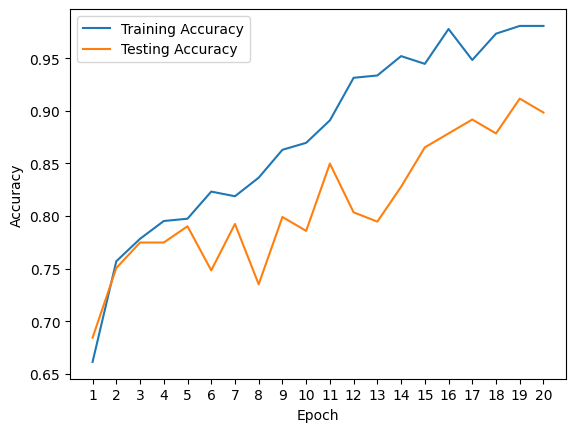

In [60]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([i for i in range(20)], [i+1 for i in range(20)])
plt.legend(loc='best')
plt.show()

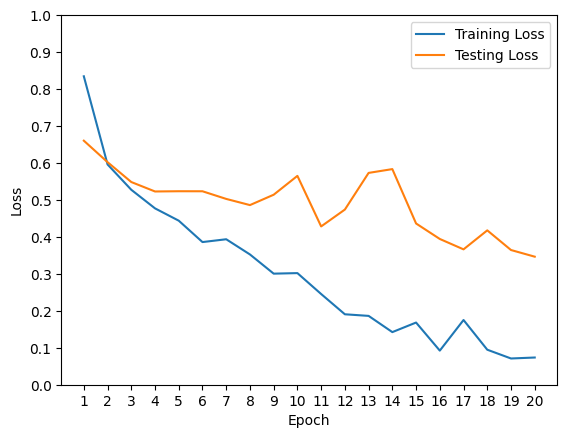

In [61]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([i for i in range(20)], [i+1 for i in range(20)])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(loc='best')
plt.show()

In [62]:
strt = time.time()
predictions = model.predict(X_test_tokenized)
end = time.time()
t4 = end - strt
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))
print("Accuracy", accuracy_score(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1)))
print("F1 Score", f1_score(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1), average = "weighted"))
print("Evaluation Time", t4)

15/15 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

    positive       0.81      0.86      0.83        64
    negative       0.91      0.96      0.93       268
     neutral       0.89      0.77      0.83       121

    accuracy                           0.89       453
   macro avg       0.87      0.86      0.86       453
weighted avg       0.89      0.89      0.89       453

Accuracy 0.891832229580574
F1 Score 0.8902827135027765
Evaluation Time 0.4470667839050293


## Model Comparison

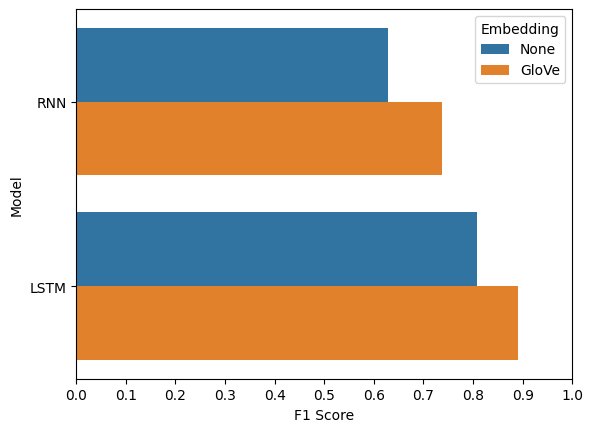

In [138]:
d = {'Model': ['RNN', 'RNN', 'LSTM', 'LSTM'], 'F1 Score': [0.629, 0.738, 0.807, 0.89], 'Embedding': ['None', 'GloVe', 'None', 'GloVe']}
df = pd.DataFrame(data=d)
fig = sns.barplot(df, y="Model", x="F1 Score", hue="Embedding", orient="h")
fig.set(xlabel='F1 Score', ylabel='Model', xticks = [i/10 for i in range(11)])
plt.show()

## Error Analysis using Best Deep Learning Model (LSTM + GloVE)

In [146]:
misclassified = []
for i in range(10):
  model = Sequential()
  model.add(Embedding(input_dim = words, output_dim = 300, input_length= X_train_tokenized.shape[1], weights = [weight_matrix], trainable = False))
  model.add(LSTM(128,return_sequences=False))
  model.add(Dropout(0.35))
  model.add(Dense(64,activation='tanh'))
  model.add(Dense(32,activation='tanh'))
  model.add(Dense(10,activation='tanh'))
  model.add(Dense(3,activation='softmax'))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

  cb = EarlyStopping(monitor = 'val_loss', patience = 20, mode = 'max', restore_best_weights = True)
  history = model.fit(X_train_tokenized , y_train, epochs = 20, batch_size = 50, validation_split = 0.25, callbacks = [cb], verbose = 0)
  predictions = model.predict(X_test_tokenized)

  preds = np.argmax(predictions, axis = 1)
  y_test_1 = np.argmax(y_test, axis = 1)
  for i in range(len(X_test)):
    if preds[i] != y_test_1[i]:
      misclassified.append(X_test[i])

15/15 [==============================] - 1s 4ms/step


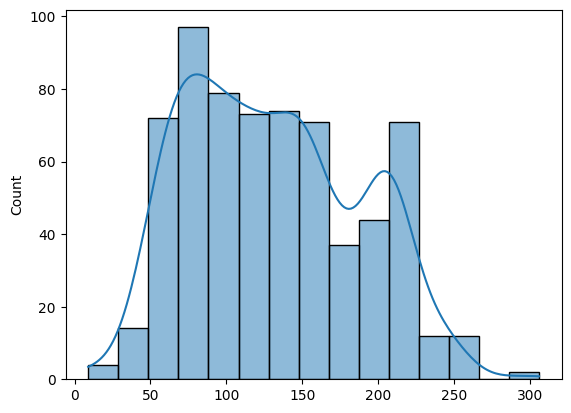

Average Misclassified Character Length: 130.47


In [147]:
misc_len_dist = [len(sentence) for sentence in misclassified]
sns.histplot(misc_len_dist, kde=True, bins=15)
plt.show()

print(f"Average Misclassified Character Length: {sum(misc_len_dist) / len(misc_len_dist):.2f}")

In [148]:
dict_1={} 
for ele in misclassified: 
    if ele in dict_1: 
        dict_1[ele] += 1 
    else: 
        dict_1[ele] = 1 

sentiment = ['Negative', 'Neutral', 'Positive']
hardest = sorted(dict_1, key=dict_1.get, reverse=True)[:5]

for item in hardest:
    print(item)
    print("Number of misclassifications in 10 runs: ", dict_1[item])
    idx = X_test.tolist().index(item)
    print("Actual:", sentiment[y_test_1[idx]])
    print("Prediction:", sentiment[preds[idx]], "\n")

Thus the method will cut working costs , and will fasten the planning and building processes .
Number of misclassifications in 10 runs:  10
Actual: Positive
Prediction: Neutral 

The company is well positioned in Brazil and Uruguay .
Number of misclassifications in 10 runs:  10
Actual: Positive
Prediction: Neutral 

The offer of some 30 million shares aimed to raise more than  x20ac 500 million US$ 640 million , was expected to be completed by Oct. 9 , Outokumpu said .
Number of misclassifications in 10 runs:  10
Actual: Neutral
Prediction: Positive 

In the end of 2006 , the number of outlets will rise to 60-70 .
Number of misclassifications in 10 runs:  10
Actual: Positive
Prediction: Neutral 

The Group also has a strong global position in other fishing categories .
Number of misclassifications in 10 runs:  10
Actual: Positive
Prediction: Neutral 

